In [22]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from generators import SyntheticMatrixGenerator, BlockDiagonalMatrixGenerator, BlockMatrixGenerator
from utils.display import show_matrix
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# for all
n_row=200
n_col=100
k=5
noise=0.1
seed=1024

# for synth
density=0.15

# for diag
overlap=[0.2, 0.1, 0.2, 0.1]

# for arbi
overlap_flag=True
size_range=[0.5, 1.0, 0.5, 1.0]

### 0. Testing `display.show_matrix`

`display.show_matrix` is a simple tool to visualize matrices side-by-side.

`settings` is a list of tuples, formatted as (matrix, location, description).

The scaling in `show_matrix` can be set in 2 ways:

- By setting `scaling=1.0`, it rescales automatically for you to generate a plot that fit the size of your screen. This is more intuitive when using a pop-up window for display. `scaling=0.5` is 50% of the optimal size.

- By setting `pixels=5`, it displays each cell in the plot with a 5-by-5-pixels block. This will overwrite the scaling settings.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1024


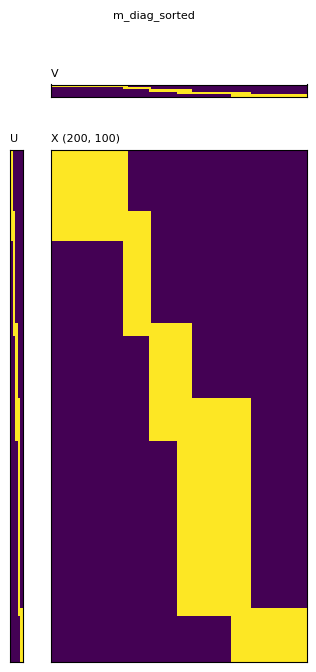

In [24]:
# testing display.show_matrix

m_diag_sorted = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=overlap)
m_diag_sorted.generate(seed=seed) # if no seed assigned, it'll use time instead

m_diag_sorted.to_dense()
settings = [(m_diag_sorted.U, [1, 0], "U"),
            (m_diag_sorted.V.T, [0, 1], "V"),
            (m_diag_sorted.X, [1, 1], "X " + str(m_diag_sorted.X.shape))]

# setting 1: half the height of screen

# this is effective in windowed display outside Jupyter Notebook

show_matrix(settings=settings, scaling=0.5, title="m_diag_sorted")

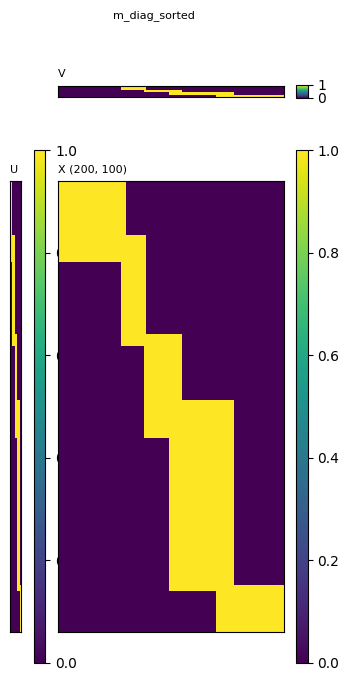

In [25]:
# colorbar, in case a matrix is real-valued

show_matrix(settings=settings, scaling=0.5, title="m_diag_sorted", colorbar=True)

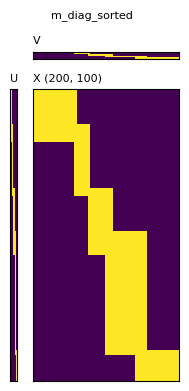

In [26]:
# setting 2: 3x3 pixels for a cell. this will ignore the scaling settings

show_matrix(settings=settings, pixels=3, title="m_diag_sorted")

# you can wrap show_matrix to fit your need. e.g. BaseGenerator.show_matrix() at below

### 1. Diagonal Boolean matrix

This generates a diagonal Boolean matrix which can lated be matrix-wise shuffled, factor-wise shuffled or noised.

Since a diagonal Boolean matrix comes with continuous-1's property (C1P) by nature, we can see the index before matrix-wise shuffling is ordered.

Key settings:

- `overlap` defines how you wish the patterns overlap with each other. `overlap` is formatted as (overlap_u, span_u, overlap_v, span_v).
- In the last example, `overlap=[0.2, 0.1, 0.2, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (0.2 ± 0.1) * a1, y1 + (0.2 ± 0.1) * b1)`, in which `(x1, y1)` is the coordinate of top-left corner of the next pattern and `a1, b1` is the size of the **next** pattern.
- The overlap_u and overlap_v can be negative, which indicates there's no overlap.
- In the example below, `overlap=[-0.1, 0.1, -0.1, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (-0.1 ± 0.1) * a0, y1 + (-0.1 ± 0.1) * b0)`, in which `a0, b0` is the size of the **current** pattern.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [-0.1  0.1 -0.1  0.1]
[I] seed         : 1024


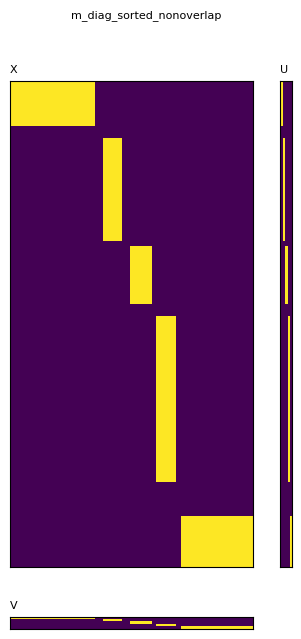

In [27]:
# negative overlap means no overlap

m_diag_sorted_nonoverlap = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[-0.1, 0.1, -0.1, 0.1])
m_diag_sorted_nonoverlap.generate(seed=seed) # if no seed assigned, use time instead

m_diag_sorted_nonoverlap.show_matrix(title="m_diag_sorted_nonoverlap")

The method `shuffle_factors()` shuffles the columns of U and rows of V to rearrange patterns.

Note that shuffling factors can change the overlapping property. The example below shows how shuffling seperates the overlapped patterns.

[I] seed         : 1024
[I] Using RandomState.
[I] Using RandomState.


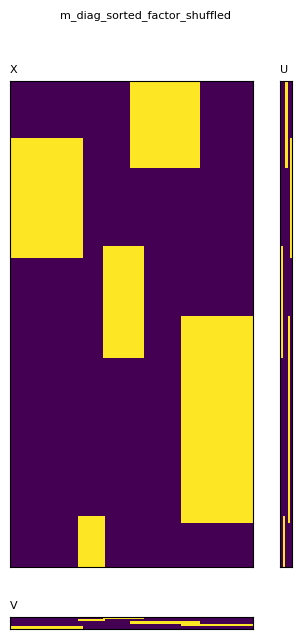

In [28]:
# shuffling factors

m_diag_sorted_factor_shuffled = deepcopy(m_diag_sorted)
m_diag_sorted_factor_shuffled.shuffle_factors(seed=seed) # you can shuffle with a new seed
# new seed will overwrite the random state of the matrix

m_diag_sorted_factor_shuffled.show_matrix(title="m_diag_sorted_factor_shuffled") 

The method `shuffle()` shuffles the columns and rows of X to disorganize patterns.

Shuffled index will be updated automatically. You can also manually re-assign the indecies to match your need.

[I] seed         : 1024
[I] Using RandomState.
[I] Using RandomState.


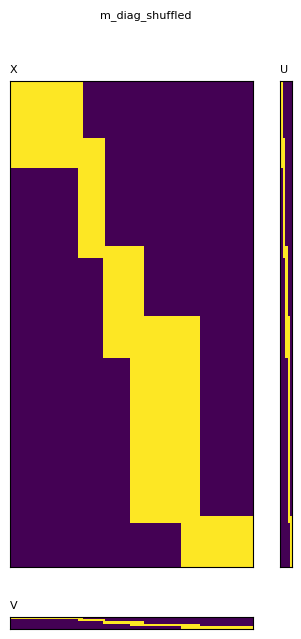

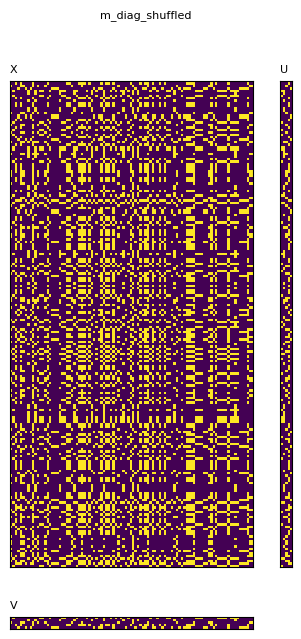

In [29]:
# shuffling the whole matrix

m_diag_shuffled = deepcopy(m_diag_sorted)
m_diag_shuffled.shuffle(seed=seed)

m_diag_shuffled.show_matrix(title="m_diag_shuffled")

# you'll see the original matrix before shuffling. show_matrix will retrace the order by U/V_order.
# to see the shuffled matrix, do this:

from utils import to_dense

X, U, V = to_dense(m_diag_shuffled.X), to_dense(m_diag_shuffled.U), to_dense(m_diag_shuffled.V.T)

settings = [(X, [0, 0], "X"), (U, [0, 1], "U"), (V, [1, 0], "V")]
show_matrix(settings=settings, pixels=5, title="m_diag_shuffled")

In [30]:
# index before and after shuffling

print(m_diag_sorted.U_order[:10])
print(m_diag_shuffled.U_order[:10])

[0 1 2 3 4 5 6 7 8 9]
[  7 176  76 189  26  37  21 159  46 154]


The method `add_noise()` flip the bits of the matrix with probability (p_pos, p_neg).

[I] noise        : [0.1 0.1]
[I] seed         : 1024
[I] Using RandomState.


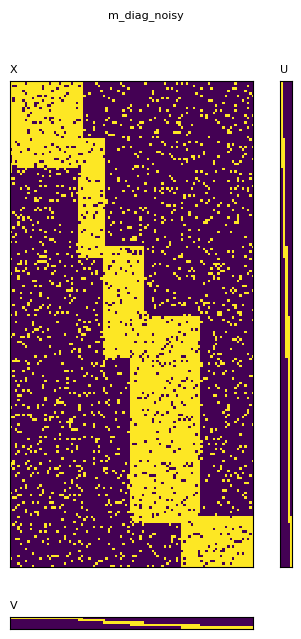

In [31]:
# adding noise

m_diag_noisy = deepcopy(m_diag_sorted)
m_diag_noisy.add_noise(noise=noise, seed=seed)

m_diag_noisy.show_matrix(title="m_diag_noisy") 

### 2. Arbitrary Boolean matrix

This generates an 'arbitrary' Boolean matrix with randomly distributed blocks.

Since an arbitrary Boolean matrix comes with continuous-1's property (C1P) by nature, the index before matrix-wise shuffling is ordered.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap_flag : True
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 1701786875


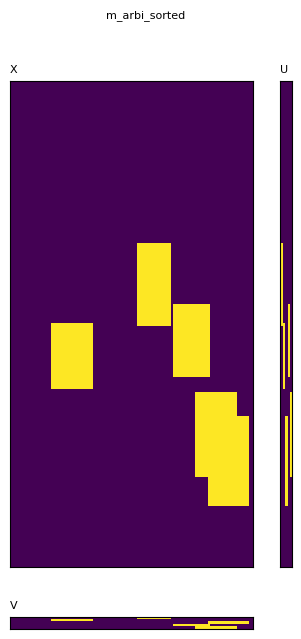

In [32]:
# 'arbitrary' Boolean matrix with randomly distributed blocks

m_arbi_sorted = BlockMatrixGenerator(m=n_row, n=n_col, k=5, overlap_flag=True, size_range=size_range)
m_arbi_sorted.generate() # if no seed assigned, use time instead

m_arbi_sorted.show_matrix(title="m_arbi_sorted")

### 3. Synthetic Boolean matrix

This generates a synthetic Boolean matrix which can lated be matrix-wise shuffled, factor-wise shuffled or noised.

Since a diagonal Boolean matrix comes with continuous-1's property (C1P) by nature, we can see the index before matrix-wise shuffling is ordered.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] density      : [0.15 0.15]
[I] seed         : 1701786875
[I] Using RandomState.
[I] Using RandomState.


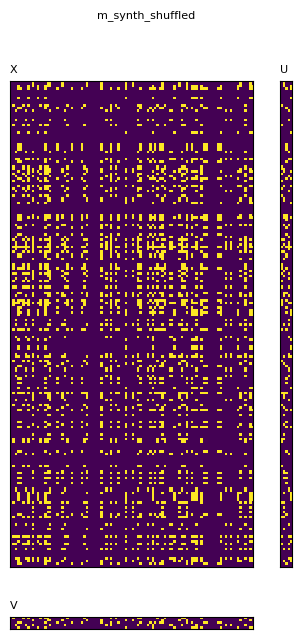

In [33]:
# synthetic Boolean matrix

m_synth_shuffled = SyntheticMatrixGenerator(m=n_row, n=n_col, k=k, density=density)
m_synth_shuffled.generate()

m_synth_shuffled.show_matrix(title="m_synth_shuffled")